In [14]:
%load_ext autoreload
%autoreload 2

import time

import matplotlib.pyplot as plt

from algorithm_analysis import algorithms, benchmark
from algorithm_analysis.plotting import plot_episode_length_over_time, plot_episode_reward_over_time
from envs.broken_components import BrokenComponentsEnv

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
t0 = time.monotonic()
components_list = benchmark.BROKEN_COMPONENTS_LIST[4]
print(f'Time until {len(components_list)} components are generated: {time.monotonic()-t0}')
env = BrokenComponentsEnv(components_list, reward_modus='raw')
# env = gym.make('Taxi-v3')
print(f'Time until env is ready: {time.monotonic()-t0}')


Time until 20 components are generated: 0.00019101799989584833
Time until env is ready: 12.079481010994641


In [16]:
discount_rates = [0.9, 0.3]
learning_rates = [0.01, 0.1]
num_plots = 2
total_runs = len(discount_rates) * len(learning_rates)
episodes = 500

Run qlearning with 1048576 states and 20 actions.



AttributeError: 'DataHandler' object has no attribute 'get_repair_failure_probability'

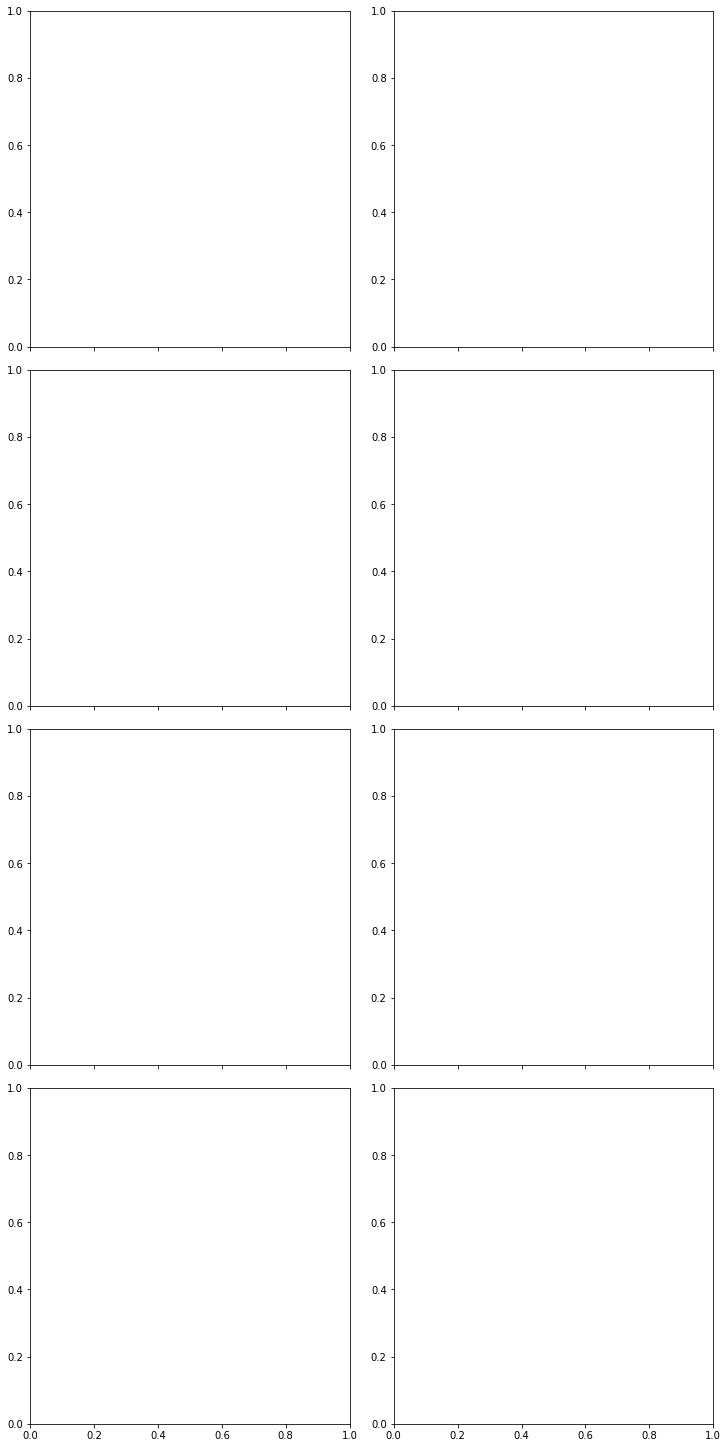

In [17]:
t0 = time.monotonic()
fig, axs = plt.subplots(total_runs, num_plots, figsize=(10, 5*total_runs), constrained_layout=True, sharex=True, sharey='col')
for i, discount_rate in enumerate(discount_rates):
    for j, learning_rate in enumerate(learning_rates):
        metric = algorithms.run_single_estimator('qlearning', env, env.observation_space.n, env.action_space.n, episodes=episodes,
                               learning_rate=learning_rate, discount_rate=discount_rate)
        ax_row = i * len(learning_rates) + j
        plot_episode_length_over_time(axs[ax_row, 0], metric, smoothing_window=20)
        plot_episode_reward_over_time(axs[ax_row, 1], metric, smoothing_window=20)
        

print(f'Time until plots are ready: {time.monotonic()-t0}')
plt.show()

In [ ]:
t0 = time.monotonic()
fig, axs = plt.subplots(total_runs, num_plots, figsize=(10, 5*total_runs), constrained_layout=True, sharex=True, sharey='col')
for i, discount_rate in enumerate(discount_rates):
    for j, learning_rate in enumerate(learning_rates):
        metric = algorithms.run_double_estimator('qlearning', env, env.observation_space.n, env.action_space.n, episodes=episodes,
                               learning_rate=learning_rate, discount_rate=discount_rate)
        ax_row = i * len(learning_rates) + j
        plot_episode_length_over_time(axs[ax_row, 0], metric, smoothing_window=20)
        plot_episode_reward_over_time(axs[ax_row, 1], metric, smoothing_window=20)
        

print(f'Time until plots are ready: {time.monotonic()-t0}')
plt.show()

In [ ]:
t0 = time.monotonic()
fig, axs = plt.subplots(total_runs, num_plots, figsize=(10, 5*total_runs), constrained_layout=True, sharex=True, sharey='col')
for i, discount_rate in enumerate(discount_rates):
    for j, learning_rate in enumerate(learning_rates):
        metric = algorithms.run_single_estimator('sarsa', env, env.observation_space.n, env.action_space.n, episodes=episodes,
                               learning_rate=learning_rate, discount_rate=discount_rate)
        ax_row = i * len(learning_rates) + j
        plot_episode_length_over_time(axs[ax_row, 0], metric, smoothing_window=20)
        plot_episode_reward_over_time(axs[ax_row, 1], metric, smoothing_window=20)


print(f'Time until plots are ready: {time.monotonic()-t0}')
plt.show()
